# Multilingual Named Entity Recognition

## The Dataset

In [ ]:
!pip install  fsspec
!pip install datasets

In [2]:
from datasets import load_dataset, DatasetDict
from datasets import get_dataset_config_names
# Instead of "from datasets import get_dataset_config", let's try to access it through the BuilderConfig class:
# from datasets.builder import BuilderConfig
from collections import defaultdict
import pandas as pd
import numpy as np
from pprint import pprint


# To get the config, you can try these methods (replace "your_dataset_name" and "your_config_name" accordingly):
# 1. Using BuilderConfig directly
# config = BuilderConfig(name="your_config_name", data_path=None, version=None, **dataset_infos["your_dataset_name"]["configs"]["your_config_name"])

# 2. Using get_dataset_config_names and load_dataset to fetch config (adjust based on your dataset)
# configs = get_dataset_config_names("your_dataset_name")
# config = load_dataset("your_dataset_name", name=configs[0]).info.builder_config

# # This should display information about the config
# print(config)

**DataSet: The Cross-lingual TRansfer Evaluation of Multilingual Encoders(XTREME)**\
Link: [https://huggingface.co/datasets/google/xtreme]

In [3]:
xtreme_subsets = get_dataset_config_names("xtreme")
# Print the configurations
print("*"*50)
print(f"XTREME has {len(xtreme_subsets)} configurations")
print("Configurations for xtreme_subsets languages:", xtreme_subsets)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/131k [00:00<?, ?B/s]

**************************************************
XTREME has 183 configurations
Configurations for xtreme_subsets languages: ['MLQA.ar.ar', 'MLQA.ar.de', 'MLQA.ar.en', 'MLQA.ar.es', 'MLQA.ar.hi', 'MLQA.ar.vi', 'MLQA.ar.zh', 'MLQA.de.ar', 'MLQA.de.de', 'MLQA.de.en', 'MLQA.de.es', 'MLQA.de.hi', 'MLQA.de.vi', 'MLQA.de.zh', 'MLQA.en.ar', 'MLQA.en.de', 'MLQA.en.en', 'MLQA.en.es', 'MLQA.en.hi', 'MLQA.en.vi', 'MLQA.en.zh', 'MLQA.es.ar', 'MLQA.es.de', 'MLQA.es.en', 'MLQA.es.es', 'MLQA.es.hi', 'MLQA.es.vi', 'MLQA.es.zh', 'MLQA.hi.ar', 'MLQA.hi.de', 'MLQA.hi.en', 'MLQA.hi.es', 'MLQA.hi.hi', 'MLQA.hi.vi', 'MLQA.hi.zh', 'MLQA.vi.ar', 'MLQA.vi.de', 'MLQA.vi.en', 'MLQA.vi.es', 'MLQA.vi.hi', 'MLQA.vi.vi', 'MLQA.vi.zh', 'MLQA.zh.ar', 'MLQA.zh.de', 'MLQA.zh.en', 'MLQA.zh.es', 'MLQA.zh.hi', 'MLQA.zh.vi', 'MLQA.zh.zh', 'PAN-X.af', 'PAN-X.ar', 'PAN-X.bg', 'PAN-X.bn', 'PAN-X.de', 'PAN-X.el', 'PAN-X.en', 'PAN-X.es', 'PAN-X.et', 'PAN-X.eu', 'PAN-X.fa', 'PAN-X.fi', 'PAN-X.fr', 'PAN-X.he', 'PAN-X.hi', 'PAN-X.

In [4]:
# Extract unique languages
unique_languages = set()
for config in xtreme_subsets:
    parts = config.split(".")
    if len(parts) == 3:  # Format: task.language1.language2
        _, lang1, lang2 = parts
        unique_languages.update([lang1, lang2])
    elif len(parts) == 2:  # Format: task.language
        _, lang = parts
        unique_languages.add(lang)

# Print the total number of unique languages
print(f"Unique languages: {len(unique_languages)}")
print("Languages:", unique_languages)


Unique languages: 109
Languages: {'ar', 'jpn', 'hu', 'fi', 'nld', 'Kazakh', 'swh', 'ur', 'tr', 'Marathi', 'ell', 'Finnish', 'kor', 'Vietnamese', 'Hungarian', 'spa', 'af', 'Greek', 'ind', 'mr', 'rus', 'eu', 'English', 'Persian', 'afr', 'deu', 'Russian', 'Basque', 'ms', 'French', 'Dutch', 'et', 'jav', 'Japanese', 'mar', 'ben', 'Tamil', 'pes', 'fa', 'Hebrew', 'urd', 'kat', 'Arabic', 'bul', 'Bulgarian', 'it', 'kaz', 'tel', 'el', 'fin', 'hin', 'ita', 'de', 'Indonesian', 'kk', 'vie', 'eus', 'nl', 'Thai', 'Estonian', 'tl', 'Korean', 'yo', 'ml', 'est', 'bg', 'fr', 'ara', 'tur', 'id', 'pt', 'sw', 'heb', 'vi', 'mal', 'Chinese', 'Telugu', 'Spanish', 'jv', 'ru', 'por', 'ko', 'hun', 'Yoruba', 'Tagalog', 'Hindi', 'Italian', 'Turkish', 'tgl', 'German', 'bn', 'ja', 'th', 'Portuguese', 'zh', 'fra', 'cmn', 'es', 'hi', 'my', 'te', 'he', 'tam', 'ka', 'tha', 'Afrikaans', 'Urdu', 'en', 'ta'}


**Persian Dataset:**

In [5]:
# Filter configurations for `Persian`
# Load the Persian dataset for Universal Dependencies POS tagging

dataset_persian = load_dataset("xtreme", name="udpos.Persian")
print(dataset_persian)


train-00000-of-00001.parquet:   0%|          | 0.00/472k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/67.3k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/67.3k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4798 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/599 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/600 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'pos_tags'],
        num_rows: 4798
    })
    validation: Dataset({
        features: ['tokens', 'pos_tags'],
        num_rows: 599
    })
    test: Dataset({
        features: ['tokens', 'pos_tags'],
        num_rows: 600
    })
})


In [6]:
print(dataset_persian.keys())
print(dataset_persian["train"].features)


dict_keys(['train', 'validation', 'test'])
{'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'pos_tags': Sequence(feature=ClassLabel(names=['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X'], id=None), length=-1, id=None)}


In [7]:
# Display some examples
# معانی تگ‌ها:

#     PRON: ضمیر (مثلاً: I, you, he)
#     AUX: فعل کمکی (مثلاً: is, am, have)
#     VERB: فعل اصلی (مثلاً: run, read, write)
#     DET: حرف تعریف (مثلاً: the, a)
#     NOUN: اسم (مثلاً: book, cat, house)
#     PUNCT: علامت نگارشی (مثلاً: ., !, ?)

print("Train sample:")
print(dataset_persian["train"][0])
print("*"*50)
print("Tokens:", dataset_persian["train"][0]["tokens"])
print("POS tags:", dataset_persian["train"][0]["pos_tags"])

Train sample:
{'tokens': ['اولین', 'سیاره', 'خارج', 'از', 'منظومه', 'شمسی', 'دیده', 'شد', '.'], 'pos_tags': [0, 7, 1, 1, 7, 0, 15, 15, 12]}
**************************************************
Tokens: ['اولین', 'سیاره', 'خارج', 'از', 'منظومه', 'شمسی', 'دیده', 'شد', '.']
POS tags: [0, 7, 1, 1, 7, 0, 15, 15, 12]


**German Dataset**

In [8]:
# Filter configurations for `German`
panx_subsets = [s for s in xtreme_subsets if s.startswith("PAN")]
print(f"PAN-X Subsets: {panx_subsets[:3]}")

# load all rows of dataset before Usage fractions and choosing language in next code.
# attention to num-rows:
load_dataset("xtreme", name="PAN-X.de")

PAN-X Subsets: ['PAN-X.af', 'PAN-X.ar', 'PAN-X.bg']


train-00000-of-00001.parquet:   0%|          | 0.00/1.18M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/590k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/588k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
})

In [9]:
# from datasets import DatasetDict

# Languages config:
langs = ["de", "fr", "it", "en"]

#Usage fractions of each language for being language's un-balacing and test performance of the model:
fracs = [0.629, 0.229, 0.084, 0.059]

# Create a defaultdict to hold the dataset splits for each language
panx_ch = defaultdict(DatasetDict) # defaultdict(*args, **kwargs)

In [11]:
for lang, frac in zip(langs, fracs):
    # Load monolingual corpus
    ds = load_dataset("xtreme", name=f"PAN-X.{lang}")
    # Shuffle and downsample each split according to spoken proportion
    for split in ds:
        panx_ch[lang][split] = (
            ds[split]
            .shuffle(seed=0)
            .select(range(int(frac * ds[split].num_rows))))

# Verify if the data is loaded correctly
for lang in panx_ch:
    print(f"Language: {lang}")
    for split in panx_ch[lang]:
        print(f"  Split: {split} -> Num Rows: {panx_ch[lang][split].num_rows}")

train-00000-of-00001.parquet:   0%|          | 0.00/837k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/419k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/423k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/932k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/459k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/464k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/942k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/472k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/472k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Language: de
  Split: train -> Num Rows: 12580
  Split: validation -> Num Rows: 6290
  Split: test -> Num Rows: 6290
Language: fr
  Split: train -> Num Rows: 4580
  Split: validation -> Num Rows: 2290
  Split: test -> Num Rows: 2290
Language: it
  Split: train -> Num Rows: 1680
  Split: validation -> Num Rows: 840
  Split: test -> Num Rows: 840
Language: en
  Split: train -> Num Rows: 1180
  Split: validation -> Num Rows: 590
  Split: test -> Num Rows: 590


In [12]:
for split in ds:
    print(split)

train
validation
test


In [13]:
def explain_tag(tag):
    """Returns a description of the named entity tag."""
    tag_descriptions = {
        "O": "Other or not a named entity.",
        "B-PER": "Beginning of a personal entity (Person).",
        "I-PER": "Continuation of a personal entity (Person).",
        "B-ORG": "Beginning of an organizational entity (Organization).",
        "I-ORG": "Continuation of an organizational entity (Organization).",
        "B-LOC": "Beginning of a location entity (Location).",
        "I-LOC": "Continuation of a location entity (Location)."
    }

    return tag_descriptions.get(tag, "Tag not recognized")

# Example usage
tags = ["O", "B-PER", "I-PER", "B-ORG", "I-ORG", "B-LOC", "I-LOC"]
for tag in tags:
    print(f"{tag}: {explain_tag(tag)}")


O: Other or not a named entity.
B-PER: Beginning of a personal entity (Person).
I-PER: Continuation of a personal entity (Person).
B-ORG: Beginning of an organizational entity (Organization).
I-ORG: Continuation of an organizational entity (Organization).
B-LOC: Beginning of a location entity (Location).
I-LOC: Continuation of a location entity (Location).


In [14]:
# Get the first element and features from the dataset
element = panx_ch["de"]["train"][0]
feature = panx_ch["de"]["train"].features

# Loop through and print tokens (elements)
for key, value in element.items():
    pprint(f"{key}: {value}")

print("*" * 50)

# Loop through and print features of the dataset
for key, value in feature.items():
    pprint(f"{key}: {value}")


("tokens: ['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', "
 "'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']")
'ner_tags: [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]'
("langs: ['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', "
 "'de']")
**************************************************
"tokens: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)"
("ner_tags: Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', "
 "'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None)")
"langs: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)"


In [15]:
tags = panx_ch["de"]["train"].features["ner_tags"].feature #.names
pprint(tags)

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'],
           id=None)


In [16]:
# Explanation of the int2str method:
# This method is most likely part of the NER tags class or object used to convert "numbers to strings" eg( O, B-PER, I-PER, etc.).
# For example, if the value of idx is 1, the int2str method will probably convert it to B-PER.

def create_tag_names(batch):
    return {"ner_tags_str": [tags.int2str(idx) for idx in batch["ner_tags"]]}

# German dataset production:
panx_de = panx_ch["de"].map(create_tag_names)
print("*" * 50)
panx_de

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

**************************************************


DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs', 'ner_tags_str'],
        num_rows: 12580
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs', 'ner_tags_str'],
        num_rows: 6290
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs', 'ner_tags_str'],
        num_rows: 6290
    })
})

In [17]:
# aaproach-1 for showing dataset:

de_example = panx_de["train"][0]
print(de_example.keys())

print("\n" , "*" * 50)

pd.DataFrame(
    [
        de_example["tokens"],
        de_example["ner_tags"],
        de_example["ner_tags_str"],
        de_example["langs"]
        ],
     [
         "Tokens", "Tags", "Tags str","langs"
         ]
)

dict_keys(['tokens', 'ner_tags', 'langs', 'ner_tags_str'])

 **************************************************


,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,0,0,0,0,5,6,0,0,5,5,6,0
Tags str,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O
langs,de,de,de,de,de,de,de,de,de,de,de,de


In [18]:
# aaproach-2 for showing dataset:

de_example = panx_de["train"][0]

# Print the keys of the example
print(de_example.keys())

# Print stars and a newline
print("\n", "*" * 50)

# Create DataFrame from the example data
df = pd.DataFrame({
    "Tokens": de_example["tokens"],
    "Tags": de_example["ner_tags"],
    "Tags str": de_example["ner_tags_str"],
    "langs": de_example["langs"]
})

# Display the DataFrame
print(df)


dict_keys(['tokens', 'ner_tags', 'langs', 'ner_tags_str'])

 **************************************************
          Tokens  Tags Tags str langs
0          2.000     0        O    de
1     Einwohnern     0        O    de
2             an     0        O    de
3            der     0        O    de
4       Danziger     5    B-LOC    de
5          Bucht     6    I-LOC    de
6             in     0        O    de
7            der     0        O    de
8     polnischen     5    B-LOC    de
9   Woiwodschaft     5    B-LOC    de
10       Pommern     6    I-LOC    de
11             .     0        O    de


In [19]:
panx_de.items()

dict_items([('train', Dataset({
    features: ['tokens', 'ner_tags', 'langs', 'ner_tags_str'],
    num_rows: 12580
})), ('validation', Dataset({
    features: ['tokens', 'ner_tags', 'langs', 'ner_tags_str'],
    num_rows: 6290
})), ('test', Dataset({
    features: ['tokens', 'ner_tags', 'langs', 'ner_tags_str'],
    num_rows: 6290
}))])

In [20]:
# NUMBER OF STARTED WITH "B":

from collections import Counter

split2freqs = defaultdict(Counter)
for split, dataset in panx_de.items():
    for row in dataset["ner_tags_str"]:
        for tag in row:
            if tag.startswith("B"):
                tag_type = tag.split("-")[1]
                split2freqs[split][tag_type] += 1
pd.DataFrame.from_dict(split2freqs, orient="index")

,LOC,ORG,PER
train,6186,5366,5810
validation,3172,2683,2893
test,3180,2573,3071


In [21]:
from collections import Counter

# Initialize a defaultdict of Counter to store frequencies
split2freqs = defaultdict(Counter)

# Loop over splits (train, validation, test) in the dataset
for split, dataset in panx_de.items():
    # Loop over each row in the dataset
    for row in dataset["ner_tags_str"]:
        # Loop over each tag in the row
        for tag in row:
            # Check if the tag starts with 'B-', 'I-', or 'O'
            if tag.startswith(("B-", "I-", "O")):
                # Check if the tag has a "-" (i.e., it's not "O")
                if "-" in tag:
                    # Extract the entity type (PERSON, ORG, LOC, etc.)
                    tag_type = tag.split("-")[1]
                else:
                    # For 'O', set the tag type as "O"
                    tag_type = "O"

                # Update the frequency count for the tag type
                split2freqs[split][tag_type] += 1

# Convert the frequency data into a DataFrame for better visualization
import pandas as pd
pd.DataFrame.from_dict(split2freqs, orient="index")


,O,LOC,ORG,PER
train,86792,9150,13029,14075
validation,43648,4634,6503,7032
test,43565,4608,6246,7406


## Multilingual Transformers

## A Closer Look at Tokenization

In [22]:
from transformers import AutoTokenizer

# Model names for BERT and XLM-RoBERTa
bert_model_name = "bert-base-cased"  # Pre-trained BERT model with cased `tokenization`
xlmr_model_name = "xlm-roberta-base"  # Pre-trained XLM-RoBERTa model for `multiple languages`

# Load the tokenizers for each model:

# Tokenizer for BERT
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)

# Tokenizer for XLM-RoBERTa which is good for sentences which have `not white-space characters`.
# for MULTI-LINGUAL suggest models such a xlmr.
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [23]:
text = "Jack Sparrow loves New York!"
bert_tokens = bert_tokenizer(text).tokens()
xlmr_tokens = xlmr_tokenizer(text).tokens()

In [24]:
df = pd.DataFrame([bert_tokens, xlmr_tokens], index=["BERT", "XLM-R"])
df

,0,1,2,3,4,5,6,7,8,9
BERT,[CLS],Jack,Spa,##rrow,loves,New,York,!,[SEP],None
XLM-R,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>


In [25]:
df = pd.DataFrame([bert_tokens + xlmr_tokens], columns=["BERT_" + str(i) for i in range(len(bert_tokens))] + ["XLM-R_" + str(i) for i in range(len(xlmr_tokens))])
df

,BERT_0,BERT_1,BERT_2,BERT_3,BERT_4,BERT_5,BERT_6,BERT_7,BERT_8,XLM-R_0,XLM-R_1,XLM-R_2,XLM-R_3,XLM-R_4,XLM-R_5,XLM-R_6,XLM-R_7,XLM-R_8,XLM-R_9
0,[CLS],Jack,Spa,##rrow,loves,New,York,!,[SEP],<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>


### The Tokenizer Pipeline

**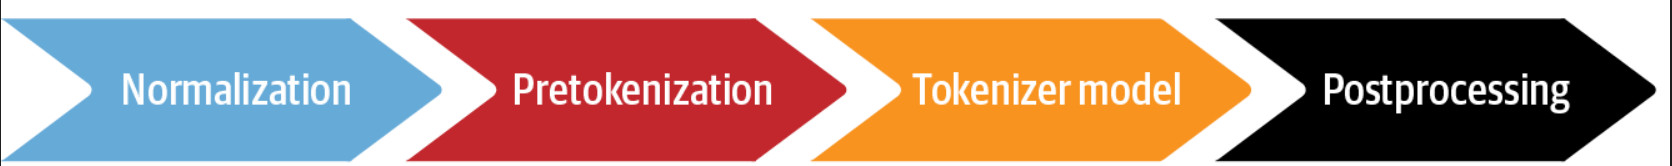**

### The SentencePiece Tokenizer

In [26]:
# Join tokens into a single string and replace a specific Unicode character ("\u2581": Unicode Character “▁” (U+2581)) with a whitespace.
"".join(xlmr_tokens).replace(u"\u2581", " ")


'<s> Jack Sparrow loves New York!</s>'

## Transformers for `Text Classification`

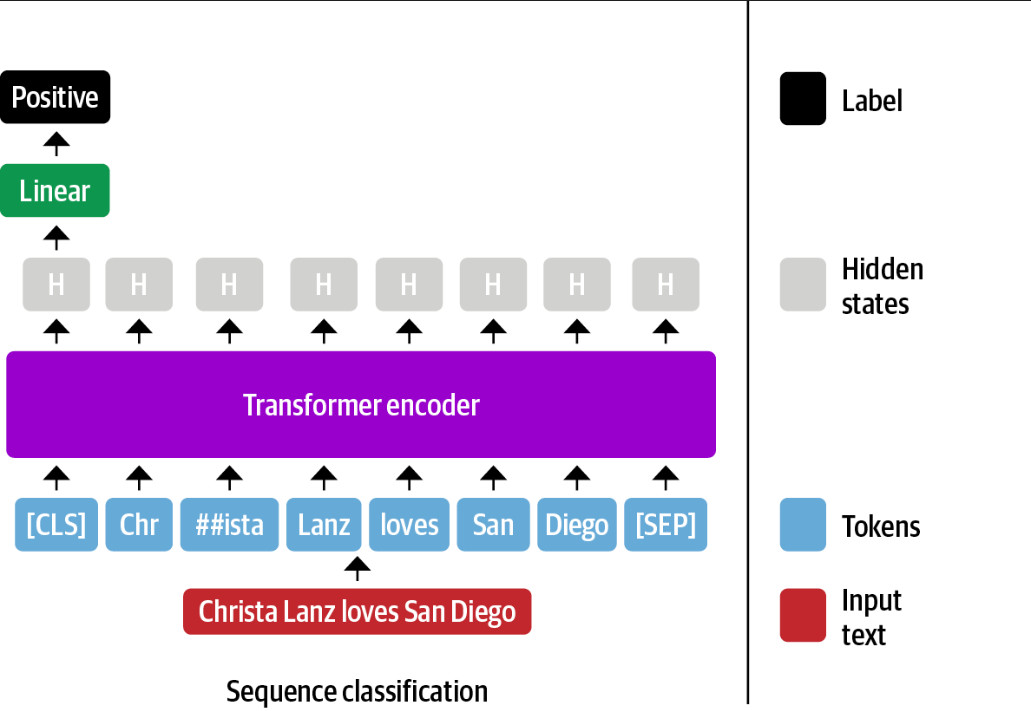

## Transformers for `Named Entity Recognition(NER)`:
* In NER , we have token classification

* IGN Tag: "Ignored" or "Not a valid tag"

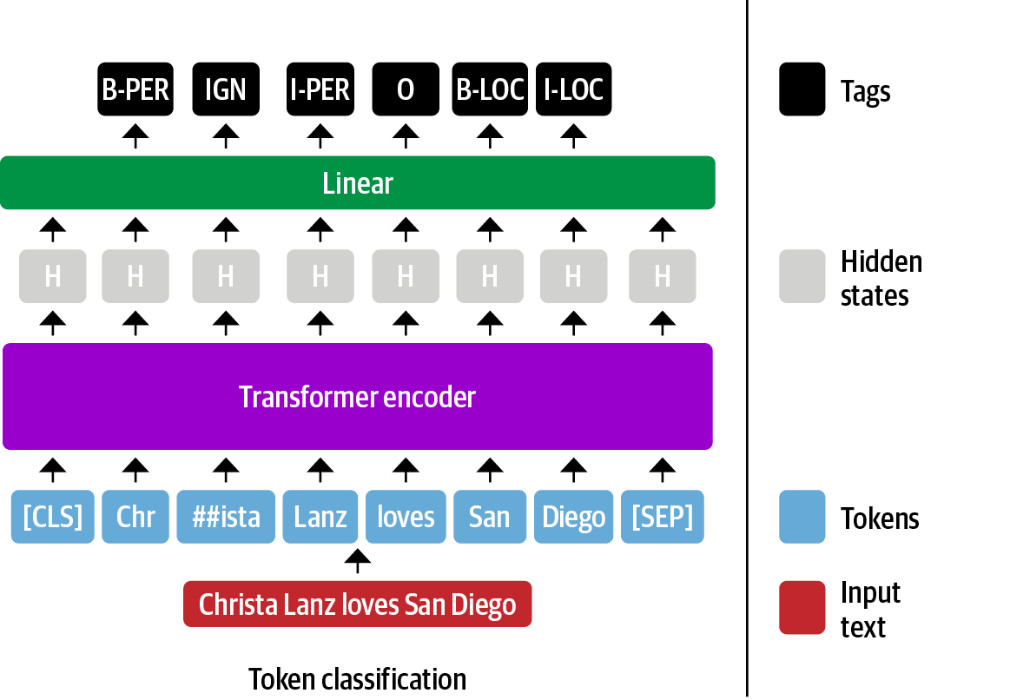

## The Anatomy of the Transformers Model Class

### Bodies and Heads

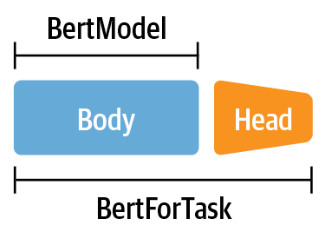

### Creating a Custom Model for Token Classification

In [27]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel

class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    # Use XLMRobertaConfig to define the model configuration
    config_class = XLMRobertaConfig

    def __init__(self, config):
        """
        Initializes the XLM-Roberta model for token classification.

        Args:
            config (XLMRobertaConfig): The configuration object containing model parameters.
        """
        super().__init__(config)
        #super(XLMRobertaForTokenClassification, self).__init__(config)

        # Number of labels for classification (e.g., named entity recognition)
        self.num_labels = config.num_labels

        # Load the RoBERTa model without pooling layer (for token-level outputs)
        #use RoBERTa model body without pooling (base on above image) because we need all tokens in output
        self.roberta = RobertaModel(config, add_pooling_layer=False)

        # Dropout layer to prevent overfitting
        self.dropout = nn.Dropout(config.hidden_dropout_prob)

        # Linear layer for token classification
        self.classifier = nn.Linear(config.hidden_size, self.num_labels)

        # Initialize model weights
        self.init_weights()

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None, **kwargs):
        """
        Forward pass for token classification.

        Args:
            input_ids (torch.Tensor): Input token IDs of shape (batch_size, sequence_length).
            attention_mask (torch.Tensor): Attention mask of shape (batch_size, sequence_length).
            token_type_ids (torch.Tensor): Token type IDs (used for sentence pair tasks) of shape (batch_size, sequence_length).
            labels (torch.Tensor): Ground truth labels of shape (batch_size, sequence_length).
            **kwargs: Additional arguments for the RoBERTa model.

        Returns:
            TokenClassifierOutput: A dataclass containing:
                - loss (torch.Tensor): Cross-entropy loss if labels are provided.
                - logits (torch.Tensor): Predicted logits of shape (batch_size, sequence_length, num_labels).
                - hidden_states (Optional[Tuple[torch.Tensor]]): Hidden states of the model.
                - attentions (Optional[Tuple[torch.Tensor]]): Attention scores of the model.
        """
        # labels = labels if labels is not None else torch.zeros(input_ids.size(0), input_ids.size(1), dtype=torch.long)
        # Get encoder outputs from the RoBERTa model
        filtered_kwargs = {k: v for k, v in kwargs.items() if k != 'num_items_in_batch'}
        outputs = self.roberta(input_ids, attention_mask=attention_mask,token_type_ids=token_type_ids, **filtered_kwargs)

        # Extract the last hidden state (token representations) and apply dropout
        # XLM-Roberta's Outputs are a tupple which is consist of:
        #           [last_hidden_state, pooler_output, hidden_states, attentions]
        # This line is specifically used to apply Dropout on last_hidden_state to randomly drop some features of the tokens to prevent the model from overfitting and improve overall.
        sequence_output = self.dropout(outputs[0])

        # Compute logits for each token
        logits = self.classifier(sequence_output)

        # Initialize loss as None
        loss = None

        if labels is not None:
            # Compute the loss if ground truth labels are provided
            loss_fct = nn.CrossEntropyLoss()  # Loss function for multi-class classification
            # Reshape logits and labels to calculate loss
            # logits: (batch_size * sequence_length, num_labels)
            # labels: (batch_size * sequence_length)
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

        # Return the TokenClassifierOutput with loss, logits, and other relevant outputs
        return TokenClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions
        )


#### ** *Some Python training codes to check the details of the classes (outside the curriculum)* **

In [28]:
# pprint(dir(RobertaModel))

In [29]:
# help(RobertaModel)

In [30]:
# help(RobertaModel.forward)

In [31]:
import inspect

# دریافت اطلاعات متد forward
signature = inspect.signature(RobertaModel.forward)
print(signature)

# لیست تمام اعضا و متدها با جزئیات
for name, data in inspect.getmembers(RobertaModel):
    print(f"{name}: {data}")


(self, input_ids: Optional[torch.Tensor] = None, attention_mask: Optional[torch.Tensor] = None, token_type_ids: Optional[torch.Tensor] = None, position_ids: Optional[torch.Tensor] = None, head_mask: Optional[torch.Tensor] = None, inputs_embeds: Optional[torch.Tensor] = None, encoder_hidden_states: Optional[torch.Tensor] = None, encoder_attention_mask: Optional[torch.Tensor] = None, past_key_values: Optional[List[torch.FloatTensor]] = None, use_cache: Optional[bool] = None, output_attentions: Optional[bool] = None, output_hidden_states: Optional[bool] = None, return_dict: Optional[bool] = None) -> Union[Tuple[torch.Tensor], transformers.modeling_outputs.BaseModelOutputWithPoolingAndCrossAttentions]
T_destination: ~T_destination
__annotations__: {}
__call__: <function Module._wrapped_call_impl at 0x797ea158e8c0>
__class__: <class 'type'>
__delattr__: <function Module.__delattr__ at 0x797ea158ec20>
__dict__: {'__module__': 'transformers.models.roberta.modeling_roberta', '__doc__': 'The ba

In [32]:
# in Jupyter or IPython
# RobertaModel?

In [33]:
# in Jupyter or IPython
# RobertaModel.forward??

### Loading a Custom Model

In [34]:
# Create a mapping from index to tag
# Example: {0: 'O', 1: 'B-PER', 2: 'I-PER', 3: 'B-ORG', 4: 'I-ORG'}
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}

# Create a mapping from tag to index (inverse of index2tag)
# Example: {'O': 0, 'B-PER': 1, 'I-PER': 2, 'B-ORG': 3, 'I-ORG': 4}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}


In [35]:
index2tag

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC'}

In [36]:
# from transformers import AutoConfig
# AutoConfig?

In [37]:
from transformers import AutoConfig

xlmr_config = AutoConfig.from_pretrained(xlmr_model_name,
                                         num_labels=tags.num_classes,
                                         id2label=index2tag,
                                         label2id=tag2index,)
pprint(xlmr_config)

XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "O",
    "1": "B-PER",
    "2": "I-PER",
    "3": "B-ORG",
    "4": "I-ORG",
    "5": "B-LOC",
    "6": "I-LOC"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "B-LOC": 5,
    "B-ORG": 3,
    "B-PER": 1,
    "I-LOC": 6,
    "I-ORG": 4,
    "I-PER": 2,
    "O": 0
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.47.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}



In [38]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
xlmr_model = (XLMRobertaForTokenClassification
              .from_pretrained(xlmr_model_name, config=xlmr_config)
              .to(device))

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
input_ids = xlmr_tokenizer.encode(text, return_tensors="pt") #pt:torch

# input_ids.shape : torch.Size([1, 10])
pd.DataFrame([xlmr_tokens, input_ids[0].numpy()], index=["Tokens", "Input IDs"])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Input IDs,0,21763,37456,15555,5161,7,2356,5753,38,2


In [40]:
input_ids[0]

tensor([    0, 21763, 37456, 15555,  5161,     7,  2356,  5753,    38,     2])

In [41]:
# torch.argmax?

In [42]:
# Ensure all model parameters and buffers are on the device
xlmr_model.to(device)

# Now pass the input_ids to the model
outputs = xlmr_model(input_ids.to(device)).logits
# When using torch.argmax with dim=1, the function operates along the columns and returns the index of the column containing the maximum value for each row.
# When using dim=-1, the function operates along the last dimension, which corresponds to the columns in most cases.
# using dim=-1 is equivalent to dim=1, as the last dimension in this case represents the columns.

predictions = torch.argmax(outputs, dim=-1)
print(f"predictions: {predictions}")
print(f"Shape of predictions: {predictions.shape}")
print(f"Number of tokens in sequence: {len(xlmr_tokens)}")
print(f"Shape of outputs: {outputs.shape}")

predictions: tensor([[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]], device='cuda:0')
Shape of predictions: torch.Size([1, 10])
Number of tokens in sequence: 10
Shape of outputs: torch.Size([1, 10, 7])


In [43]:
predictions[0]

tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6], device='cuda:0')

In [44]:
# results is not good:
preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
pd.DataFrame([xlmr_tokens, preds], index=["Tokens", "Tags"])

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>
Tags,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC,I-LOC


In [45]:
def tag_text(text, tags, model, tokenizer):
    # Get tokens with special characters
    tokens = tokenizer(text).tokens()
    # Encode the sequence into IDs
    input_ids = xlmr_tokenizer(text, return_tensors="pt").input_ids.to(device)
    # Get predictions as distribution over 7 possible classes
    outputs = model(input_ids)[0]
    # Take argmax to get most likely class per token
    predictions = torch.argmax(outputs, dim=2)
    # Convert to DataFrame
    preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
    return pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])


## Tokenizing Texts for NER

* use word ids for passing true ids for ner task

In [46]:
words, labels = de_example["tokens"], de_example["ner_tags"]

In [47]:
words

['2.000',
 'Einwohnern',
 'an',
 'der',
 'Danziger',
 'Bucht',
 'in',
 'der',
 'polnischen',
 'Woiwodschaft',
 'Pommern',
 '.']

In [48]:
labels

[0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]

In [49]:
tokenized_input = xlmr_tokenizer(de_example["tokens"], is_split_into_words=True)
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])

In [50]:
tokenized_input

{'input_ids': [0, 70101, 176581, 19, 142, 122, 2290, 708, 1505, 18363, 18, 23, 122, 127474, 15439, 13787, 14, 15263, 18917, 663, 6947, 19, 6, 5, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [51]:
pd.DataFrame([tokens], index=["Tokens"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>


In [52]:
word_ids = tokenized_input.word_ids()
pd.DataFrame([tokens, word_ids], index=["Tokens", "Word IDs"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None


In [53]:
previous_word_idx = None
label_ids = []

for word_idx in word_ids:
    if word_idx is None or word_idx == previous_word_idx:
        label_ids.append(-100) # In cross-entropy, the number is -100 for ignore index cases.
    elif word_idx != previous_word_idx:
        label_ids.append(labels[word_idx])
    previous_word_idx = word_idx

labels = [index2tag[l] if l != -100 else "IGN" for l in label_ids] #IGN:Ignore
index = ["Tokens", "Word IDs", "Label IDs", "Labels"]

pd.DataFrame([tokens, word_ids, label_ids, labels], index=index)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


In [54]:
# Map and Aalign to all dataset:

def tokenize_and_align_labels(examples):
    # Tokenize the input tokens using the tokenizer, truncating and splitting words as needed
    tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True,
                                      is_split_into_words=True)

    labels = []  # Initialize an empty list to store the aligned labels

    # Iterate over each example's ner_tags to align labels with the tokenized words
    for idx, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=idx)  # Get word IDs for each tokenized input
        previous_word_idx = None  # Keep track of the previous word index to handle word tokenization
        label_ids = []  # List to store the labels corresponding to the tokenized input

        # Iterate over the word IDs to align labels
        for word_idx in word_ids:
            # If the token is a subword or the same as the previous token, set label to -100 (ignore it)
            if word_idx is None or word_idx == previous_word_idx:
                label_ids.append(-100) # In cross-entropy, the number is -100 for ignore index cases.
            else:
                # Otherwise, use the label corresponding to the current word
                label_ids.append(label[word_idx])

            previous_word_idx = word_idx  # Update the previous word index

        labels.append(label_ids)  # Append the aligned label list for this example

    tokenized_inputs["labels"] = labels  # Add the aligned labels to the tokenized inputs
    return tokenized_inputs  # Return the tokenized inputs with the aligned labels


In [55]:
def encode_panx_dataset(corpus):
    # Apply the tokenize_and_align_labels function to the corpus, processing the data in batches
    # Remove the unnecessary columns: 'langs', 'ner_tags', and 'tokens' from the dataset
    return corpus.map(tokenize_and_align_labels, batched=True,
                      remove_columns=['langs', 'ner_tags', 'tokens'])


In [56]:
panx_de_encoded = encode_panx_dataset(panx_ch["de"])

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [57]:
panx_de_encoded

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 12580
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 6290
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 6290
    })
})

## Performance Measures

In [ ]:
!pip install seqeval

In [59]:
from seqeval.metrics import classification_report

y_true = [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"],
          ["B-PER", "I-PER", "O"]]
y_pred = [["O", "O", "B-MISC", "I-MISC", "I-MISC", "I-MISC", "O"],
          ["B-PER", "I-PER", "O"]]
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



In [60]:
# First version align_predictions function:

# import numpy as np
# #Evaluating a NER model is similar to evaluating a text classification model, and it is common to report results for precision, recall, and F1-score.
# # The only subtlety is that all words of an entity need to be predicted correctly in order for a prediction to be counted as correct.

# def align_predictions(predictions, label_ids):
#     preds = np.argmax(predictions, axis=2)
#     batch_size, seq_len = preds.shape
#     labels_list, preds_list = [], []

#     for batch_idx in range(batch_size):
#         example_labels, example_preds = [], []
#         for seq_idx in range(seq_len):
#             # Ignore label IDs = -100
#             if label_ids[batch_idx, seq_idx] != -100:
#                 example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
#                 example_preds.append(index2tag[preds[batch_idx][seq_idx]])

#         labels_list.append(example_labels)
#         preds_list.append(example_preds)

#     return preds_list, labels_list

In [82]:
# Second version align_predictions function:

def align_predictions(predictions, label_ids):
    """
    Aligns the predictions and label IDs to consider ignored tokens (-100).

    Args:
    predictions (np.ndarray): Model predictions, shaped [batch_size, sequence_length, num_labels].
    label_ids (np.ndarray): True labels, shaped [batch_size, sequence_length].

    Returns:
    Tuple[list, list]: aligned lists of predicted and true labels.
    """

    preds = np.argmax(predictions, axis=2)  # Get the most likely label index for each token
    batch_size, seq_len = preds.shape

    # Convert tag indices to tag names using the global 'tags' object
    out_label_list = [[] for _ in range(batch_size)]
    preds_list = [[] for _ in range(batch_size)]

    for batch_idx in range(batch_size):
        for seq_idx in range(seq_len):
            # Only consider tokens that are not ignored (-100)
            if label_ids[batch_idx, seq_idx] != -100:
                # Get the tag name for the predicted label
                try:
                    predicted_tag = tags.int2str(preds[batch_idx][seq_idx])
                except ValueError:
                    # Handle the case where 'preds[batch_idx][seq_idx]' is not a valid tag index
                    predicted_tag = "O"  # Assign a default tag for unknown indices

                # Get the tag name for the actual label
                try:
                    actual_tag = tags.int2str(label_ids[batch_idx][seq_idx])
                except ValueError:
                    # Handle the case where 'label_ids[batch_idx][seq_idx]' is not a valid tag index
                    actual_tag = "O"

                # Append to the label and prediction lists for the current example
                out_label_list[batch_idx].append(actual_tag)
                preds_list[batch_idx].append(predicted_tag)

    return preds_list, out_label_list

In [83]:
# Test align_predictions function:

predictions = np.array([[[0.2, 0.7, 0.1], [0.3, 0.6, 0.1], [0.4, 0.5, 0.1]],
                        [[0.1, 0.8, 0.1], [0.3, 0.6, 0.1], [0.4, 0.4, 0.2]]])  # Shape: (batch_size, seq_len, num_classes)

label_ids = np.array([[0, 1, -100], [1, 0, 2]])  # Shape: (batch_size, seq_len)

# Example index2tag (for simplicity)
index2tag = {0: 'O', 1: 'B-PER', 2: 'I-PER'}

# Call the function and print the result
preds_list, labels_list = align_predictions(predictions, label_ids)

print("Predictions:", preds_list)
print("Labels:", labels_list)

Predictions: [['O', 'O'], ['O', 'O', 'O']]
Labels: [['O', 'O'], ['O', 'O', 'O']]


## Fine-Tuning XLM-RoBERTa

**First version of training_args:**

In [84]:
# from transformers import TrainingArguments

# # Number of epochs to train the model
# num_epochs = 3

# batch_size = 16
# # Batch size set to 12 after trying a higher value (24) and running out of memory
# ## Nope! ... out of memory using the default 24 ... so ...
# # batch_size = 12

# eval_batch_size = 64

# # Calculate the number of logging steps based on the training set size and batch size
# logging_steps = len(panx_de_encoded["train"]) // batch_size

# # Define the model's output directory with a dynamic name based on the model name
# model_name = f"{xlmr_model_name}-finetuned-panx-de"

# # Initialize the training arguments with various settings
# training_args = TrainingArguments(
#     output_dir=f"./results/{model_name}",  # Directory to store model outputs (checkpoints, logs)
#     log_level="error",  # Set the logging level to only show error messages
#     logging_dir=f"./logs/{model_name}",  # Directory for storing logs
#     logging_steps=logging_steps,      # Log every 10 steps
#     num_train_epochs=num_epochs,  # Set the number of epochs for training
#     per_device_train_batch_size=batch_size,  # Batch size for training
#     per_device_eval_batch_size=eval_batch_size,  # Batch size for evaluation
#     # eval_strategy="epoch",  # Evaluate the model at the end of each epoch
#     evaluation_strategy="epoch", # => this is old version
#     save_strategy="epoch",    # Save checkpoints at the end of each epoch
#     # save_steps=1e6,  # Save the model only after a very large number of steps (essentially disables frequent saves)
#     weight_decay=0.01,   # Apply weight decay regularization to prevent overfitting
#     learning_rate=2e-5,  # Learning rate
#     disable_tqdm=False,  # Enable tqdm progress bar during training
#     logging_steps=logging_steps,  # Log training progress every 'logging_steps' steps
#     push_to_hub=False,   # Push the model to the Hugging Face Model Hub after training
#     run_name="xlmr_ner_german",  # Set a custom run name to avoid conflict
# )

**Second version of training_args:**

In [85]:
from transformers import TrainingArguments

# Number of epochs to train the model
num_epochs = 3

# Batch size for training
# Note: Initial batch size set to 24 caused out-of-memory (OOM) issues, so it was reduced to 12
# batch_size = 24  # Initial batch size
batch_size = 12  # Final batch size after encountering OOM issues

# Calculate the number of logging steps dynamically based on training dataset size and batch size
logging_steps = len(panx_de_encoded["train"]) // batch_size

# Define a dynamic name for the model output directory based on the model name
model_name = f"{xlmr_model_name}-finetuned-panx-de"

# Set up training arguments with specific configurations
training_args = TrainingArguments(
    output_dir=model_name,  # Directory to save model outputs and checkpoints
    log_level="error",  # Log only errors to keep output clean
    num_train_epochs=num_epochs,  # Total number of training epochs
    per_device_train_batch_size=batch_size,  # Batch size for training per device (e.g., GPU/TPU)
    per_device_eval_batch_size=batch_size,  # Batch size for evaluation per device
    evaluation_strategy="epoch",  # Evaluate the model at the end of each epoch
    save_steps=1e6,  # Save model checkpoints only after a very high number of steps (disabled frequent saving)
    weight_decay=0.01,  # Weight decay to prevent overfitting
    disable_tqdm=False,  # Enable tqdm progress bars during training
    logging_steps=logging_steps,  # Log training progress every 'logging_steps' steps
    push_to_hub=True  # Push the trained model to the Hugging Face Model Hub
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Logging HuggingFace:
from huggingface_hub import notebook_login
notebook_login()

In [87]:
# from seqeval.metrics import f1_score

# def compute_metrics(eval_pred):
#     y_pred, y_true = align_predictions(eval_pred.predictions,
#                                        eval_pred.label_ids)
#     return {"f1": f1_score(y_true, y_pred)}

In [88]:
from seqeval.metrics import f1_score
from seqeval.scheme import IOB2

def compute_metrics(eval_pred):
    """
    Computes the F1 score for NER using aligned predictions and labels.

    Args:
    eval_pred (EvalPrediction): object containing predictions and labels.

    Returns:
    dict: dictionary containing the F1 score.
    """
    # Align predictions and labels
    y_pred, y_true = align_predictions(eval_pred.predictions, eval_pred.label_ids)

    # Calculate and return the F1 score with zero_division handling
    return {"f1": f1_score(y_true, y_pred, zero_division=1)}  # zero_division set to 1 to avoid divide by zero errors


In [89]:
from transformers import DataCollatorForTokenClassification

# Data collator that will dynamically pad the inputs received, as well as the labels.
# Initialize the data collator for token classification task. the data collator takes care of padding the sequences dynamically during the batch creation to ensure that all sequences in a batch have the same length, which is necessary for training.

data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

In [90]:
data_collator

DataCollatorForTokenClassification(tokenizer=XLMRobertaTokenizerFast(name_or_path='xlm-roberta-base', vocab_size=250002, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	250001: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}
), padding=True, max_length=None, pad_to_multi

In [91]:
def model_init():
    return (XLMRobertaForTokenClassification
            .from_pretrained(xlmr_model_name, config=xlmr_config)
            .to(device))

In [92]:
# Below line of code:

# "%env TOKENIZERS_PARALLELISM=false" is used to set an environment variable that controls parallelism for tokenizers in the transformers library. Here is a breakdown of what this does:

# Explanation:
#     %env: This is an IPython magic command, typically used in Jupyter notebooks, which allows you to set environment variables for the current notebook session.
#     TOKENIZERS_PARALLELISM: This environment variable controls whether the tokenizer will use multiple threads for parallel processing. By default, the transformers library uses parallelism to speed up tokenization.
#     false: Setting TOKENIZERS_PARALLELISM to false disables parallelism, which can be useful in certain situations where parallelization leads to issues (e.g., memory consumption or conflicts in multi-threaded environments).


%env TOKENIZERS_PARALLELISM=True


env: TOKENIZERS_PARALLELISM=True


In [93]:
# from transformers import Trainer
# Trainer?

In [94]:
from transformers import Trainer, TrainingArguments

# Initialize the Trainer for model training and evaluation
# The Trainer class is a high-level API for training and evaluating models in the Hugging Face library
trainer = Trainer(
    model_init=model_init,  # Function to initialize the model usually with a pretrained model)
    args=training_args,  # The training arguments, including hyperparameters like batch size, epochs, etc.
    data_collator=data_collator,  # Data collator to dynamically pad token sequences during training
    compute_metrics=compute_metrics,  # Function to compute evaluation metrics (e.g., accuracy, F1-score)
    train_dataset=panx_de_encoded["train"],  # Training dataset (pre-encoded)
    eval_dataset=panx_de_encoded["validation"],  # Validation dataset (pre-encoded)
    tokenizer=xlmr_tokenizer  # Tokenizer used for data preprocessing and decoding
)
# processing_class=xlmr_tokenizer  # Replace 'tokenizer' with 'processing_class' in version 5.0.0 of the HuggingFace

<ipython-input-94-c0a7bc5d8867>:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [95]:
# If pushToHub is False, the model won't be pushed to Hugging Face Hub

push_to_hub=False
# push_to_hub=pushToHub

In [ ]:
pip install --upgrade transformers torch


In [97]:
# Run Training process for our model:
%%time
trainer.train()

Epoch,Training Loss,Validation Loss,F1
1,0.252500,0.166455,0.000000
2,0.130900,0.144276,0.000000
3,0.076200,0.146306,0.000000


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:159: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:159: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


CPU times: user 10min 20s, sys: 11.5 s, total: 10min 32s
Wall time: 12min 39s


TrainOutput(global_step=3147, training_loss=0.153114375630219, metrics={'train_runtime': 733.0352, 'train_samples_per_second': 51.485, 'train_steps_per_second': 4.293, 'total_flos': 742543002652968.0, 'train_loss': 0.153114375630219, 'epoch': 3.0})

In [99]:
# if pushToHub:
#     trainer.push_to_hub(commit_message="Training completed!")

In [100]:
import pandas as pd

# Convert the training log history into a DataFrame and select relevant columns
df = pd.DataFrame(trainer.state.log_history)[['epoch', 'loss', 'eval_loss', 'eval_f1']]

# Rename columns to make them more readable
df = df.rename(columns={"epoch": "Epoch", "loss": "Training Loss", "eval_loss": "Validation Loss", "eval_f1": "F1"})

# Round the epoch values to the nearest integer
df['Epoch'] = df["Epoch"].apply(lambda x: round(x))

# Forward-fill missing values for "Training Loss"
df['Training Loss'] = df["Training Loss"].ffill()

# Backward-fill and forward-fill missing values for "Validation Loss" and "F1"
df[['Validation Loss', 'F1']] = df[['Validation Loss', 'F1']].bfill().ffill()

# Remove duplicate rows
df = df.drop_duplicates()

# Display the final DataFrame
print(df)


   Epoch  Training Loss  Validation Loss   F1
0      1         0.2525         0.166455  0.0
2      2         0.1309         0.144276  0.0
4      3         0.0762         0.146306  0.0


In [101]:
text_de = "Jeff Dean ist ein Informatiker bei Google in Kalifornien"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁ist,▁ein,▁Informati,ker,▁bei,▁Google,▁in,▁Kaliforni,en,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC,I-LOC,O


## Error Analysis

In [102]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Convert dict of lists to list of dicts suitable for data collator
    features = [dict(zip(batch, t)) for t in zip(*batch.values())]
    # Pad inputs and labels and put all tensors on device
    batch = data_collator(features)
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["labels"].to(device)
    with torch.no_grad():
        # Pass data through model
        output = trainer.model(input_ids, attention_mask)
        # Logit.size: [batch_size, sequence_length, classes]
        # Predict class with largest logit value on classes axis
        predicted_label = torch.argmax(output.logits, axis=-1).cpu().numpy()
    # Calculate loss per token after flattening batch dimension with view
    loss = cross_entropy(output.logits.view(-1, 7),
                         labels.view(-1), reduction="none")
    # Unflatten batch dimension and convert to numpy array
    loss = loss.view(len(input_ids), -1).cpu().numpy()

    return {"loss":loss, "predicted_label": predicted_label}

In [ ]:
valid_set = panx_de_encoded["validation"]
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=32)
df = valid_set.to_pandas()

In [105]:
# index2tag[-100] = "IGN"
# df["input_tokens"] = df["input_ids"].apply(
#     lambda x: xlmr_tokenizer.convert_ids_to_tokens(x))
# df["predicted_label"] = df["predicted_label"].apply(
#     lambda x: [index2tag[i] for i in x])
# df["labels"] = df["labels"].apply(
#     lambda x: [index2tag[i] for i in x])
# df['loss'] = df.apply(
#     lambda x: x['loss'][:len(x['input_ids'])], axis=1)
# df['predicted_label'] = df.apply(
#     lambda x: x['predicted_label'][:len(x['input_ids'])], axis=1)
# df.head(1)

In [106]:
# Apply mapping with a safeguard for missing keys
df["predicted_label"] = df["predicted_label"].apply(
    lambda x: [index2tag[i] if i in index2tag else "UNKNOWN" for i in x])

df["labels"] = df["labels"].apply(
    lambda x: [index2tag[i] if i in index2tag else "UNKNOWN" for i in x])

# Trim loss and predicted labels to the correct length
df['loss'] = df.apply(
    lambda x: x['loss'][:len(x['input_ids'])], axis=1)
df['predicted_label'] = df.apply(
    lambda x: x['predicted_label'][:len(x['input_ids'])], axis=1)

df.head(1)


,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,"[0, 10699, 11, 15, 16104, 1388, 2]","[1, 1, 1, 1, 1, 1, 1]","[IGN, UNKNOWN, IGN, UNKNOWN, UNKNOWN, UNKNOWN,...","[0.0, 0.004118889, 0.0, 0.0059100636, 0.004861...","[UNKNOWN, UNKNOWN, UNKNOWN, UNKNOWN, UNKNOWN, ...","[<s>, ▁Ham, a, ▁(, ▁Unternehmen, ▁), </s>]"


In [107]:
df_tokens = df.apply(pd.Series.explode)
df_tokens = df_tokens.query("labels != 'IGN'")
df_tokens["loss"] = df_tokens["loss"].astype(float).round(2)
df_tokens.head(7)

<ipython-input-107-91b3f906728f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tokens["loss"] = df_tokens["loss"].astype(float).round(2)


,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,10699,1,UNKNOWN,0.00,UNKNOWN,▁Ham
0,15,1,UNKNOWN,0.01,UNKNOWN,▁(
0,16104,1,UNKNOWN,0.00,UNKNOWN,▁Unternehmen
0,1388,1,UNKNOWN,0.01,UNKNOWN,▁)
1,56530,1,O,0.00,O,▁WE
1,83982,1,UNKNOWN,1.10,UNKNOWN,▁Luz
1,10,1,UNKNOWN,1.36,UNKNOWN,▁a


In [108]:
(
    df_tokens.groupby("input_tokens")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)  # Get rid of multi-level columns
    .sort_values(by="sum", ascending=False)
    .reset_index()
    .round(2)
    .head(10)
    .T
)

,0,1,2,3,4,5,6,7,8,9
input_tokens,▁,▁der,▁in,▁von,▁und,▁/,▁),▁(,▁'',▁des
count,6066,1388,989,808,1171,163,246,246,2898,366
mean,0.04,0.11,0.15,0.16,0.09,0.55,0.32,0.32,0.02,0.15
sum,226.85,146.01,145.02,129.3,102.94,88.9,78.25,77.66,71.1,53.79


In [109]:
(
    df_tokens.groupby("labels")[["loss"]]
    .agg(["count", "mean", "sum"])
    .droplevel(level=0, axis=1)
    .sort_values(by="mean", ascending=False)
    .reset_index()
    .round(2)
    .T
)

,0,1,2,3
labels,UNKNOWN,B-PER,I-PER,O
count,11137,2893,4139,43648
mean,0.52,0.28,0.2,0.03
sum,5763.18,819.39,836.64,1472.22


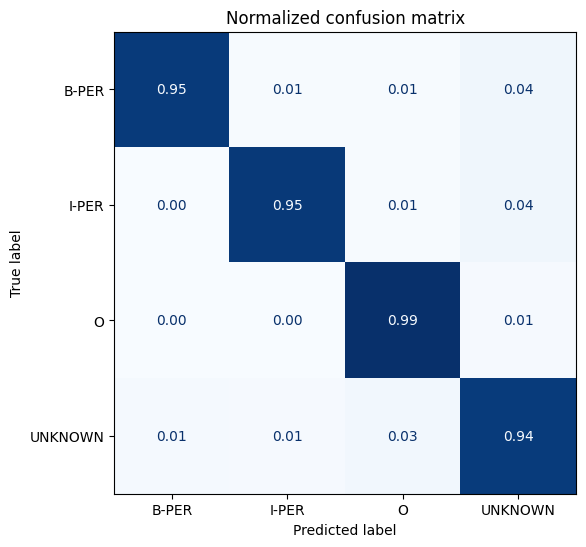

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    # Set display_labels to unique values in y_true or y_preds
    # this ensures the confusion matrix has the correct number of labels
    unique_labels = sorted(set(y_true) | set(y_preds))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(
    df_tokens["labels"],
    df_tokens["predicted_label"],
    # Replace this with unique labels in your data if different from tags.names
    sorted(set(df_tokens["labels"]) | set(df_tokens["predicted_label"]))
)

In [116]:
def get_samples(df):
    for _, row in df.iterrows():
        labels, preds, tokens, losses = [], [], [], []
        for i, mask in enumerate(row["attention_mask"]):
            if i not in {0, len(row["attention_mask"])}:
                labels.append(row["labels"][i])
                preds.append(row["predicted_label"][i])
                tokens.append(row["input_tokens"][i])
                losses.append(f"{row['loss'][i]:.2f}")
        df_tmp = pd.DataFrame({"tokens": tokens, "labels": labels,
                               "preds": preds, "losses": losses}).T
        yield df_tmp

df["total_loss"] = df["loss"].apply(sum)
df_tmp = df.sort_values(by="total_loss", ascending=False).head(3)

for sample in get_samples(df_tmp):
    display(sample)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
tokens,▁',▁'',▁Τ,Κ,▁'',▁',▁',▁'',▁T,▁'',▁',ri,▁'',▁',k,▁'',▁',ala,</s>
labels,O,O,O,IGN,O,O,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,IGN,UNKNOWN,UNKNOWN,IGN,UNKNOWN,UNKNOWN,IGN,IGN
preds,O,O,UNKNOWN,UNKNOWN,O,O,O,O,UNKNOWN,O,O,O,O,O,O,O,O,O,O
losses,0.00,0.00,5.25,0.00,0.00,0.00,12.00,9.92,10.06,7.99,8.94,0.00,8.94,9.15,0.00,9.18,9.42,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
tokens,▁'',8,.,▁Juli,▁'',▁:,▁Protest,camp,▁auf,▁dem,▁Gelände,▁der,▁Republika,n,ischen,▁Gar,de,</s>
labels,UNKNOWN,IGN,IGN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,IGN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,IGN,IGN,UNKNOWN,IGN,IGN
preds,O,O,O,O,O,O,O,O,O,O,O,O,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,O
losses,9.22,0.00,0.00,8.92,9.52,9.78,6.90,0.00,7.87,9.60,8.19,6.95,5.21,0.00,0.00,0.00,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
tokens,▁United,▁Nations,▁Multi,dimensional,▁Integra,ted,▁Stabil,ization,▁Mission,▁in,▁the,▁Central,▁African,▁Republic,</s>
labels,B-PER,I-PER,I-PER,IGN,I-PER,IGN,I-PER,IGN,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,IGN
preds,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
losses,7.25,6.99,6.74,0.00,6.45,0.00,6.39,0.00,6.63,6.18,6.46,6.60,6.66,6.24,0.00


In [117]:
df_tmp = df.loc[df["input_tokens"].apply(lambda x: u"\u2581(" in x)].head(2)
for sample in get_samples(df_tmp):
    display(sample)

,0,1,2,3,4,5
tokens,▁Ham,a,▁(,▁Unternehmen,▁),</s>
labels,UNKNOWN,IGN,UNKNOWN,UNKNOWN,UNKNOWN,IGN
preds,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
losses,0.00,0.00,0.01,0.00,0.01,0.00


,0,1,2,3,4,5,6,7
tokens,▁Kesk,kül,a,▁(,▁Mart,na,▁),</s>
labels,UNKNOWN,IGN,IGN,UNKNOWN,UNKNOWN,IGN,UNKNOWN,IGN
preds,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
losses,0.01,0.00,0.00,0.01,0.01,0.00,0.01,0.00


## Cross-Lingual Transfer

In [118]:
def get_f1_score(trainer, dataset):
    return trainer.predict(dataset).metrics["test_f1"]

In [119]:
f1_scores = defaultdict(dict)
f1_scores["de"]["de"] = get_f1_score(trainer, panx_de_encoded["test"])
print(f"F1-score of [de] model on [de] dataset: {f1_scores['de']['de']:.3f}")

/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:159: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


F1-score of [de] model on [de] dataset: 0.000


In [120]:
text_fr = "Jeff Dean est informaticien chez Google en Californie"
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁est,▁informatic,ien,▁chez,▁Google,▁en,▁Cali,for,nie,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,I-LOC,I-LOC,O


In [149]:
def evaluate_lang_performance(lang, trainer):
    """
    Evaluates the performance of the model on a specific language dataset.

    Args:
    lang (str): The language code (e.g., 'de', 'fr', etc.).
    trainer (Trainer): The Trainer instance used for evaluation.

    Returns:
    float: The F1 score of the model on the test set of the specified language.
    """
    # Step 1: Encode the dataset for the given language
    panx_ds = encode_panx_dataset(panx_ch[lang])  # panx_ch should be a dictionary with languages as keys

    # Step 2: Get the F1 score using the trainer's evaluation
    f1_score = get_f1_score(trainer, panx_ds["test"])  # Assuming panx_ds["test"] is the test dataset

    return f1_score


In [150]:
f1_scores["de"]["fr"] = evaluate_lang_performance("fr", trainer)
print(f"F1-score of [de] model on [fr] dataset: {f1_scores['de']['fr']:.3f}")

F1-score of [de] model on [fr] dataset: 0.000


In [123]:
print(f"F1-score of [de] model on [fr] dataset: {f1_scores['de']['fr']:.3f}")

F1-score of [de] model on [fr] dataset: 0.000


In [ ]:
f1_scores["de"]["it"] = evaluate_lang_performance("it", trainer)
print(f"F1-score of [de] model on [it] dataset: {f1_scores['de']['it']:.3f}")

In [125]:
print(f"F1-score of [de] model on [it] dataset: {f1_scores['de']['it']:.3f}")

F1-score of [de] model on [it] dataset: 0.000


In [126]:
f1_scores["de"]["en"] = evaluate_lang_performance("en", trainer)
print(f"F1-score of [de] model on [en] dataset: {f1_scores['de']['en']:.3f}")

Map:   0%|          | 0/1180 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

F1-score of [de] model on [en] dataset: 0.000


In [127]:
print(f"F1-score of [de] model on [en] dataset: {f1_scores['de']['en']:.3f}")

F1-score of [de] model on [en] dataset: 0.000


### When Does Zero-Shot Transfer Make Sense?

In [128]:
def train_on_subset(dataset, num_samples):
    train_ds = dataset["train"].shuffle(seed=42).select(range(num_samples))
    valid_ds = dataset["validation"]
    test_ds = dataset["test"]
    training_args.logging_steps = len(train_ds) // batch_size

    trainer = Trainer(model_init=model_init, args=training_args,
        data_collator=data_collator, compute_metrics=compute_metrics,
        train_dataset=train_ds, eval_dataset=valid_ds, tokenizer=xlmr_tokenizer)
    trainer.train()
    if training_args.push_to_hub:
        trainer.push_to_hub(commit_message="Training completed!")

    f1_score = get_f1_score(trainer, test_ds)
    return pd.DataFrame.from_dict(
        {"num_samples": [len(train_ds)], "f1_score": [f1_score]})

In [129]:
panx_fr_encoded = encode_panx_dataset(panx_ch["fr"])

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

In [134]:
# training_args.push_to_hub = pushToHub
metrics_df = train_on_subset(panx_fr_encoded, 250)
metrics_df

<ipython-input-128-69586400e35b>:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model_init=model_init, args=training_args,


Epoch,Training Loss,Validation Loss,F1
1,1.480500,1.022079,0.000000
2,0.877100,0.674143,0.000000
3,0.614200,0.580609,0.000000


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:159: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


,num_samples,f1_score
0,250,0.0


In [135]:
# Hack needed to exclude the progress bars in the above cell
metrics_df

,num_samples,f1_score
0,250,0.0


In [138]:
# for num_samples in [500, 1000, 2000, 4000]:
#     metrics_df = metrics_df.append(
#         train_on_subset(panx_fr_encoded, num_samples), ignore_index=True)

In [137]:
# import pandas as pd

# Instead of using append, use pd.concat:
metrics_list = [metrics_df]  # Start with the initial metrics_df

for num_samples in [500, 1000, 2000, 4000]:
    # Get the new DataFrame from train_on_subset
    new_df = train_on_subset(panx_fr_encoded, num_samples)
    # Append the new DataFrame to the list
    metrics_list.append(new_df)

# Concatenate all DataFrames in the list into a single DataFrame
metrics_df = pd.concat(metrics_list, ignore_index=True)

<ipython-input-128-69586400e35b>:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model_init=model_init, args=training_args,


Epoch,Training Loss,Validation Loss,F1
1,1.175900,0.691545,0.000000
2,0.558900,0.487308,0.000000
3,0.359300,0.446086,0.000000


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:159: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:159: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


<ipython-input-128-69586400e35b>:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model_init=model_init, args=training_args,


Epoch,Training Loss,Validation Loss,F1
1,0.909900,0.519848,0.000000
2,0.394100,0.422348,0.000000
3,0.250500,0.382217,0.000000


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:159: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


<ipython-input-128-69586400e35b>:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model_init=model_init, args=training_args,


Epoch,Training Loss,Validation Loss,F1
1,0.656200,0.379835,0.000000
2,0.296300,0.335874,0.000000
3,0.191900,0.331684,0.000000


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:159: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


<ipython-input-128-69586400e35b>:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model_init=model_init, args=training_args,


Epoch,Training Loss,Validation Loss,F1
1,0.524300,0.346614,0.000000
2,0.275800,0.342264,0.000000
3,0.176800,0.315146,0.000000


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:159: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


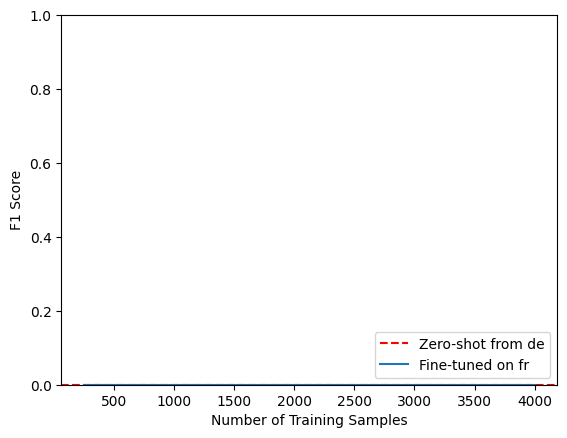

In [140]:
fig, ax = plt.subplots()
ax.axhline(f1_scores["de"]["fr"], ls="--", color="r")
metrics_df.set_index("num_samples").plot(ax=ax)
plt.legend(["Zero-shot from de", "Fine-tuned on fr"], loc="lower right")
plt.ylim((0, 1))
plt.xlabel("Number of Training Samples")
plt.ylabel("F1 Score")
plt.show()

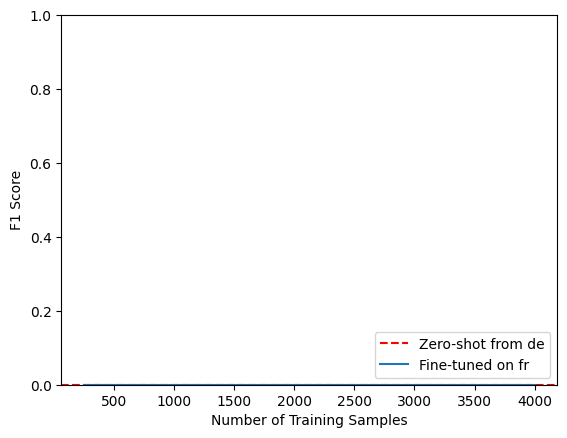

In [139]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming f1_scores and metrics_df are already defined

# Create the plot
fig, ax = plt.subplots()

# Add a horizontal line for the zero-shot F1 score (using the f1_scores dictionary)
ax.axhline(f1_scores["de"]["fr"], ls="--", color="r", label="Zero-shot from de")

# Plot the metrics DataFrame, setting 'num_samples' as the index
metrics_df.set_index("num_samples").plot(ax=ax)

# Add the legend with appropriate labels
plt.legend(["Zero-shot from de", "Fine-tuned on fr"], loc="lower right")

# Set the y-axis limit from 0 to 1 (since F1 score is in this range)
plt.ylim((0, 1))

# Label the axes
plt.xlabel("Number of Training Samples")
plt.ylabel("F1 Score")

# Display the plot
plt.show()


### Fine-Tuning on Multiple Languages at Once

In [141]:
from datasets import concatenate_datasets

def concatenate_splits(corpora):
    multi_corpus = DatasetDict()
    for split in corpora[0].keys():
        multi_corpus[split] = concatenate_datasets(
            [corpus[split] for corpus in corpora]).shuffle(seed=42)
    return multi_corpus

In [142]:
panx_de_fr_encoded = concatenate_splits([panx_de_encoded, panx_fr_encoded])

In [144]:
training_args.logging_steps = len(panx_de_fr_encoded["train"]) // batch_size
# training_args.push_to_hub = pushToHub
training_args.output_dir = "xlm-roberta-base-finetuned-panx-de-fr"

trainer = Trainer(model_init=model_init, args=training_args,
    data_collator=data_collator, compute_metrics=compute_metrics,
    tokenizer=xlmr_tokenizer, train_dataset=panx_de_fr_encoded["train"],
    eval_dataset=panx_de_fr_encoded["validation"])

<ipython-input-144-b7f63f6382e2>:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model_init=model_init, args=training_args,


In [145]:
%%time
trainer.train()

Epoch,Training Loss,Validation Loss,F1
1,0.278600,0.189939,0.000000
2,0.153100,0.168678,0.000000
3,0.096400,0.181623,0.000000


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:159: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:159: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


CPU times: user 13min 59s, sys: 13.4 s, total: 14min 12s
Wall time: 15min 22s


TrainOutput(global_step=4290, training_loss=0.17601913416580164, metrics={'train_runtime': 906.8944, 'train_samples_per_second': 56.765, 'train_steps_per_second': 4.73, 'total_flos': 969428250265464.0, 'train_loss': 0.17601913416580164, 'epoch': 3.0})

In [ ]:
# if pushToHub:
#     trainer.push_to_hub(commit_message="Training completed!")

In [148]:
for lang in langs:
    f1 = evaluate_lang_performance(lang, trainer)
    print(f"F1-score of [de-fr] model on [{lang}] dataset: {f1:.3f}")

F1-score of [de-fr] model on [de] dataset: 0.000


F1-score of [de-fr] model on [fr] dataset: 0.000


F1-score of [de-fr] model on [it] dataset: 0.000


F1-score of [de-fr] model on [en] dataset: 0.000


In [151]:
for lang in langs:
    f1 = evaluate_lang_performance(lang, trainer)
    print(f"F1-score of [de-fr] model on [{lang}] dataset: {f1:.3f}")

F1-score of [de-fr] model on [de] dataset: 0.000


F1-score of [de-fr] model on [fr] dataset: 0.000


F1-score of [de-fr] model on [it] dataset: 0.000


F1-score of [de-fr] model on [en] dataset: 0.000


In [152]:
corpora = [panx_de_encoded]

# Exclude German from iteration
for lang in langs[1:]:
    training_args.output_dir = f"xlm-roberta-base-finetuned-panx-{lang}"
    # Fine-tune on monolingual corpus
    ds_encoded = encode_panx_dataset(panx_ch[lang])
    metrics = train_on_subset(ds_encoded, ds_encoded["train"].num_rows)
    # Collect F1-scores in common dict
    f1_scores[lang][lang] = metrics["f1_score"][0]
    # Add monolingual corpus to list of corpora to concatenate
    corpora.append(ds_encoded)

<ipython-input-128-69586400e35b>:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model_init=model_init, args=training_args,


Epoch,Training Loss,Validation Loss,F1
1,0.513300,0.324838,1.000000
2,0.257100,0.311206,1.000000
3,0.164900,0.301803,1.000000


<ipython-input-128-69586400e35b>:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model_init=model_init, args=training_args,


Epoch,Training Loss,Validation Loss,F1
1,0.586800,0.341861,1.000000
2,0.246800,0.282769,1.000000
3,0.149500,0.258071,1.000000


<ipython-input-128-69586400e35b>:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model_init=model_init, args=training_args,


Epoch,Training Loss,Validation Loss,F1
1,0.884100,0.488954,1.000000
2,0.441200,0.460048,1.000000
3,0.319200,0.413389,1.000000


In [153]:
corpora_encoded = concatenate_splits(corpora)

In [154]:
%%time
trainer.train()

Epoch,Training Loss,Validation Loss,F1
1,0.221000,0.189939,0.000000
2,0.138400,0.168678,0.000000
3,0.081700,0.181623,0.000000


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:159: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:159: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


CPU times: user 13min 27s, sys: 12.1 s, total: 13min 39s
Wall time: 15min 30s


TrainOutput(global_step=4290, training_loss=0.17601912616294024, metrics={'train_runtime': 929.442, 'train_samples_per_second': 55.388, 'train_steps_per_second': 4.616, 'total_flos': 969428250265464.0, 'train_loss': 0.17601912616294024, 'epoch': 3.0})

In [ ]:
# if pushToHub:
#     trainer.push_to_hub(commit_message="Training completed!")

In [155]:
for idx, lang in enumerate(langs):
    f1_scores["all"][lang] = get_f1_score(trainer, corpora[idx]["test"])

In [156]:
scores_data = {"de": f1_scores["de"],
               "each": {lang: f1_scores[lang][lang] for lang in langs},
               "all": f1_scores["all"]}
f1_scores_df = pd.DataFrame(scores_data).T.round(4)
f1_scores_df.rename_axis(index="Fine-tune on", columns="Evaluated on",
                         inplace=True)
f1_scores_df

Evaluated on,de,fr,it,en
Fine-tune on,,,,
de,0.0,0.0,0.0,0.0
each,0.0,1.0,1.0,1.0
all,0.0,0.0,0.0,0.0


## Interacting with Model Widgets

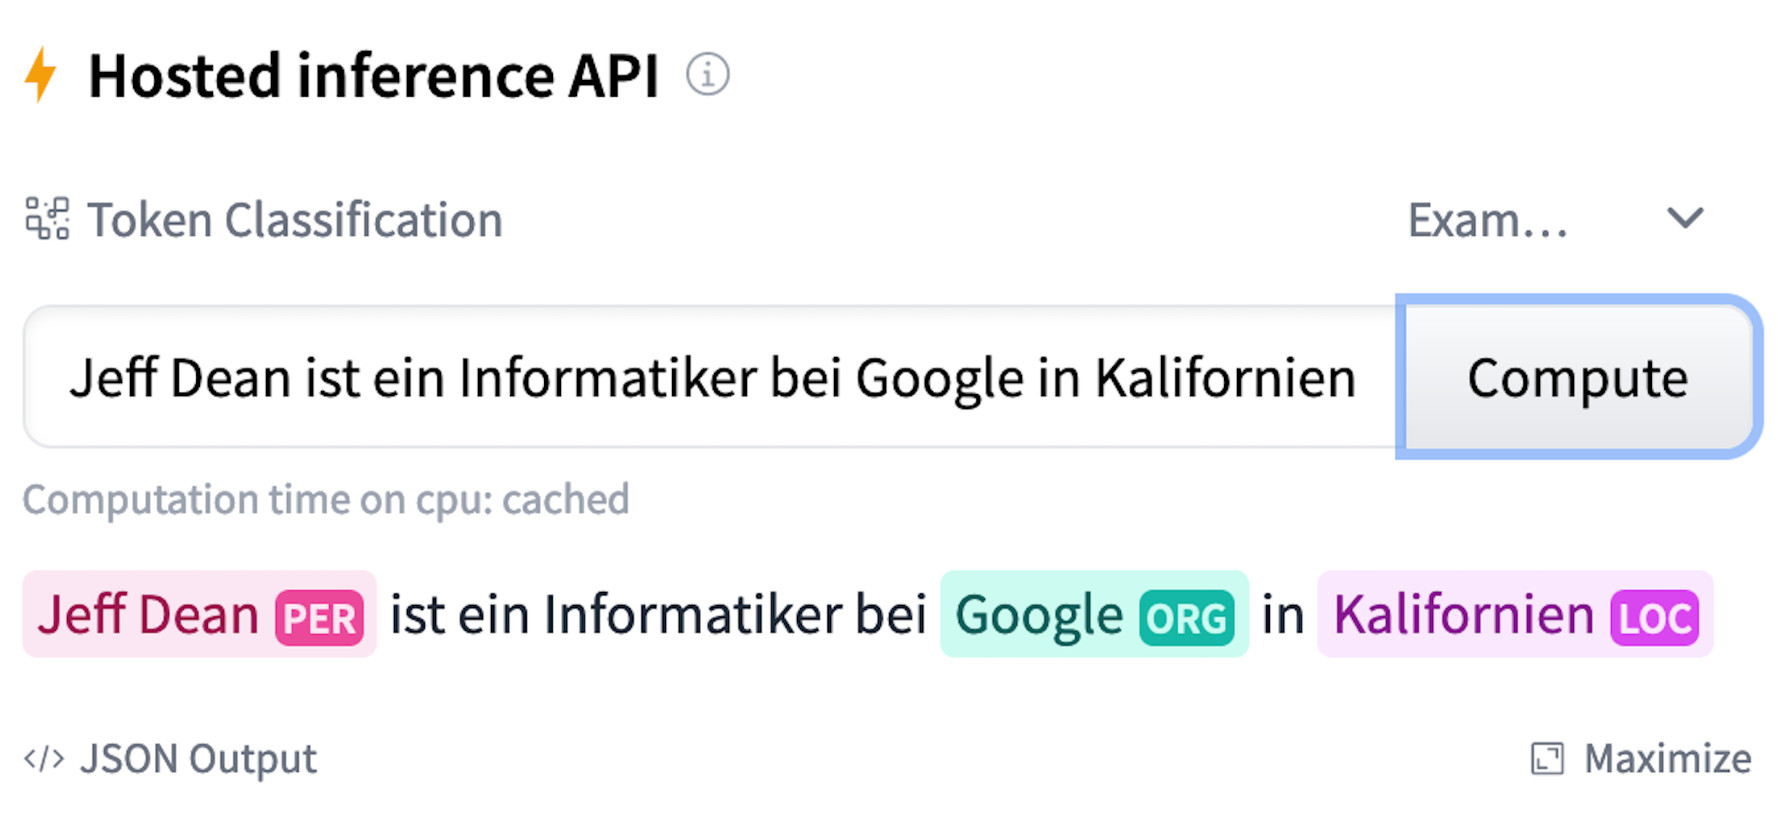

## Conclusion

In [158]:
import time

# Assuming startTime is already defined earlier in the code
startTime = time.time()

# Perform some operations...

# End time calculation
endTime = time.time()
elapsedTime = time.strftime("%H:%M:%S", time.gmtime(endTime - startTime))

# Print the current date and elapsed time
todaysDate = time.localtime()  # Get the current date and time
print(time.strftime('# Run Date: %A, %B %d, %Y', todaysDate))
print(f"# Run Time: {elapsedTime}")


# Run Date: Thursday, January 02, 2025
# Run Time: 00:00:00


## Saving the model

In [162]:
import shutil

# Zipped all directories
shutil.make_archive('/content/colab_models', 'zip', '/content', 'wandb')
shutil.make_archive('/content/xlm_roberta_models', 'zip', '/content', 'xlm-roberta-base-finetuned-panx-de')
shutil.make_archive('/content/xlm_roberta_models_fr', 'zip', '/content', 'xlm-roberta-base-finetuned-panx-de-fr')
shutil.make_archive('/content/xlm_roberta_models_en', 'zip', '/content', 'xlm-roberta-base-finetuned-panx-en')
shutil.make_archive('/content/xlm_roberta_models_it', 'zip', '/content', 'xlm-roberta-base-finetuned-panx-it')
shutil.make_archive('/content/xlm_roberta_models_fr', 'zip', '/content', 'xlm-roberta-base-finetuned-panx-fr')


In [164]:
from google.colab import files

# Download to your system
files.download('/content/colab_models.zip')
files.download('/content/xlm_roberta_models.zip')
files.download('/content/xlm_roberta_models_fr.zip')
files.download('/content/xlm_roberta_models_en.zip')
files.download('/content/xlm_roberta_models_it.zip')
files.download('/content/xlm_roberta_models_fr.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## To use your saved models

**1. Extract Files (if you've downloaded zip files):**

In [ ]:
import zipfile
import os

# Extract zip files
with zipfile.ZipFile('/path/to/your/file.zip', 'r') as zip_ref:
    zip_ref.extractall('/path/to/extracted/directory')

# Check the contents of the extracted directory
os.listdir('/path/to/extracted/directory')


**2. Load Saved Models:**

In [ ]:
from transformers import RobertaForTokenClassification, RobertaTokenizer

# Load the model and tokenizer from the extracted directory
model_path = "/path/to/extracted/directory/xlm-roberta-base-finetuned-panx-de"
tokenizer_path = model_path  # Usually the model and tokenizer are stored in the same folder

model = RobertaForTokenClassification.from_pretrained(model_path)
tokenizer = RobertaTokenizer.from_pretrained(tokenizer_path)

# Use the model for prediction
inputs = tokenizer("Some text to classify", return_tensors="pt")
outputs = model(**inputs)

# Results
print(outputs)


**3. Use the Model for Specific Tasks:**

In [ ]:
from transformers import pipeline

# Load the model using a pipeline
ner_model = pipeline("ner", model=model, tokenizer=tokenizer)

# Use the model to predict named entities
results = ner_model("Barack Obama was born in Hawaii.")
print(results)


**4. Use the Model for Evaluation or Prediction on Your Own Data:**

In [ ]:
from transformers import Trainer

trainer = Trainer(model=model, tokenizer=tokenizer)

# Prediction on test data
test_data = ["Some test sentence for evaluation"]
predictions = trainer.predict(test_data)

print(predictions)
